## By: Blessing Olabosoye
# **Single-trait Analysis with JWAS**

### Using pedigree and genomic information

In [53]:
using Pkg
using JWAS
using Plots
using StatsPlots
using CSV
using DataFrames
using Statistics
using TidierPlots
using Images

Precompiling Images
  ✓ FFTViews
  ✓ IntegralArrays
  ✓ RegionTrees
  ✓ CoordinateTransformations
  ✓ ArnoldiMethod
  ✓ ImageShow
  ✓ Rotations
  ✓ StaticArrayInterface → StaticArrayInterfaceStaticArraysExt
  ✓ HistogramThresholding
  ✓ Rotations → RotationsRecipesBaseExt
  ✓ ImageMagick
  ✓ TiledIteration
  ✓ LoopVectorization → ForwardDiffExt
  ✓ ImageBinarization
  ✓ ImageTransformations
  ✓ Graphs
  ✓ SimpleWeightedGraphs
  ✓ ImageMorphology
  ✓ ImageContrastAdjustment
  ✓ ImageDistances
  ✓ JLD2
  ✓ MetaGraphs
  ✓ ImageFiltering
  ✓ ImageSegmentation
  ✓ ImageCorners
  ✓ ImageQualityIndexes
  ✓ Images
  27 dependencies successfully precompiled in 94 seconds. 160 already precompiled.


In [55]:
Pkg.status()

Status `C:\Users\blezn\.julia\environments\v1.10\Project.toml`
⌃ [336ed68f] CSV v0.10.12
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.1
  [7073ff75] IJulia v1.24.2
  [916415d5] Images v0.26.0
  [c9a035f4] JWAS v1.2.1
⌃ [ff71e718] MixedModels v4.22.3
  [b98c9c47] Pipe v1.3.0
⌃ [91a5bcdd] Plots v1.40.0
⌅ [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.7
⌃ [337ecbd1] TidierPlots v0.5.4
  [b8865327] UnicodePlots v3.6.3
  [ade2ca70] Dates
  [10745b16] Statistics v1.10.0
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [57]:
#Read Pedigree
pedigree = CSV.read("C:/Users/blezn/Downloads/Homework_1/file_ped.csv", DataFrame)
df_ped = get_pedigree(pedigree, separator = ",", header = true)

Pedigree information:
#individuals: 1038
#sires:       11
#dams:        67
#founders:    1


JWAS.PedModule.Pedigree(1039, Dict{AbstractString, JWAS.PedModule.PedNode}("1886" => JWAS.PedModule.PedNode(8, "335", "314", 0.5), "6086" => JWAS.PedModule.PedNode(9, "0", "0", 0.5), "2243" => JWAS.PedModule.PedNode(13, "326", "489", 0.5), "1164" => JWAS.PedModule.PedNode(17, "335", "479", 0.5), "1881" => JWAS.PedModule.PedNode(20, "335", "324", 0.5), "1907" => JWAS.PedModule.PedNode(22, "335", "473", 0.5), "2057" => JWAS.PedModule.PedNode(28, "330", "470", 0.5), "491" => JWAS.PedModule.PedNode(29, "6323", "6086", 0.5), "1195" => JWAS.PedModule.PedNode(33, "311", "480", 0.5), "1377" => JWAS.PedModule.PedNode(36, "335", "316", 0.5)…), Dict(56 => 1.0, 3490 => 1.0, 60 => 1.0, 2288 => 1.0, 4196 => 1.0, 17236 => 1.0, 2688 => 1.0, 1074 => 1.0, 67 => 1.0, 2377 => 1.0…), Set{Any}(), Set{Any}(), Set{Any}(), Set{Any}(), ["0", "6323", "6071", "335", "6327", "6456", "314", "1886", "6086", "326"  …  "2004", "1627", "1107", "2118", "1777", "1805", "1138", "2053", "1474", "1766"])

In [59]:
#Read phenotype
df_pheno = CSV.read("C:/Users/blezn/Downloads/Homework_1/file_data.csv", DataFrame)
df_pheno.ID = string.(df_pheno.ID)
df_pheno

921×10 DataFrame
 Row │ ID      Sex      Age    PercDuroc  BirthWt  ADG      CarcassWt  Carcass ⋯
     │ String  String1  Int64  Float64    Float64  Float64  Float64    Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1001    M          182   0.512385     1.91   881.41      97.51      33. ⋯
   2 │ 1002    F          161   0.594028     1.91   804.1       78.0       21.
   3 │ 1003    M          161   0.480193     2.18  1041.2       99.77      27.
   4 │ 1004    F          161   0.426823     2.0    886.57      86.62      15.
   5 │ 1006    F          179   0.505264     1.5    680.39      60.77      22. ⋯
   6 │ 1007    M          161   0.46094      1.91   886.57      83.45      21.
   7 │ 1011    M          161   0.441662     1.59   917.49      85.26      21.
   8 │ 1012    F          179   0.509923     1.68   561.84      63.95      11.
   9 │ 1013    M          161   0.506975     1.68   865.95      79.37      21. ⋯
  10 │ 1015    M          179   0.50545      1.72   804.1       93.88      26.
  11 │ 1018    F          159   0.367879     1.91   860.79      80.73      13.
  ⋮  │   ⋮        ⋮       ⋮        ⋮         ⋮        ⋮         ⋮          ⋮   ⋱
 912 │ 2303    M          166   0.487996     2.45  1189.3       96.6       30.
 913 │ 2305    M          163   0.480528     2.4    929.31      83.9       33. ⋯
 914 │ 2311    M          165   0.513636     0.77  1006.75      84.13      50.
 915 │ 2315    M          162   0.477058     1.45  1056.54      87.98      27.
 916 │ 2317    M          165   0.522986     1.95   995.69      78.68      25.
 917 │ 2323    M          176   0.499525     1.18   890.59      89.34      27. ⋯
 918 │ 2325    M          176   0.5357       1.18   923.78      86.62      35.
 919 │ 2327    M          162   0.393661     1.72  1017.82      85.26      25.
 920 │ 2329    M          162   0.537579     2.09  1028.88      88.89      24.
 921 │ 2333    M          162   0.499404     1.45  1012.29      89.34      40. ⋯
                                                  3 columns and 900 rows omitted

In [61]:
#Read Genotype
df_geno = CSV.read("C:/Users/blezn/Downloads/Homework_1/file_geno.csv", DataFrame)
df_geno.ID = string.(df_geno.ID)
df_geno

1015×42429 DataFrame
  Row │ ID      MARC0044150  ASGA0000014  H3GA0000026  ASGA0000021  ALGA000000 ⋯
      │ String  Int64        Int64        Int64        Int64        Int64      ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 1001              1            1            1            1             ⋯
    2 │ 1002              1            1            1            1
    3 │ 1003              1            1            1            1
    4 │ 1004              1            1            1            1
    5 │ 1006              0            1            2            2             ⋯
    6 │ 1007              1            1            1            1
    7 │ 1011              1            1            1            1
    8 │ 1012              0            1            2            2
    9 │ 1013              1            1            1            1             ⋯
   10 │ 1015              0            1            2            2
   11 │ 1018              1            1            1            1
  ⋮   │   ⋮          ⋮            ⋮            ⋮            ⋮            ⋮     ⋱
 1006 │ 6447              2            2            1            0
 1007 │ 6448              1            2            1            1             ⋯
 1008 │ 6449              1            2            1            1
 1009 │ 6450              1            2            1            1
 1010 │ 6456              1            2            1            1
 1011 │ 6458              2            2            0            0             ⋯
 1012 │ 6476              2            2            0            0
 1013 │ 6695              1            2            1            1
 1014 │ 6696              0            1            2            2
 1015 │ 6701              1            2            1            1             ⋯
                                              42424 columns and 994 rows omitted

In [63]:
#Convert Genotype file to numeric (Float64)
cols = names(df_geno)[2:end]
for col in cols
       df_geno[!, col] .= parse.(Float64, string.(df_geno[!, col]))
       end #to convert from int64 to Float64

## Part A: Run BayesA

In [65]:
#PartA.Set model genotype
geno = get_genotypes(df_geno, method = "BayesA")

The first column in the dataframe should be individual IDs.
The data type of markers should be Number.
Missing values (9.0) are replaced by column means.
0 loci which are fixed or have minor allele frequency < 0.01 are removed.
Genotype informatin:
#markers: 42428; #individuals: 1015


JWAS.Genotypes(false, false, AbstractString["1001", "1002", "1003", "1004", "1006", "1007", "1011", "1012", "1013", "1015"  …  "6447", "6448", "6449", "6450", "6456", "6458", "6476", "6695", "6696", "6701"], ["MARC0044150", "ASGA0000014", "H3GA0000026", "ASGA0000021", "ALGA0000009", "ALGA0000014", "H3GA0000032", "ASGA0000005", "M1GA0000060", "ASGA0000047"  …  "ALGA0100301", "ASGA0081621", "DRGA0017329", "ALGA0100306", "ALGA0100305", "H3GA0052154", "ALGA0100307", "M1GA0023917", "M1GA0023927", "H3GA0052166"], 1015, 42428, [0.39852216839790344 0.8167487978935242 … 0.7876847386360168 0.7876847386360168], 16010.160665452859, true, Float32[0.20295566 -0.6334976 … 0.42463052 0.42463052; 0.20295566 -0.6334976 … 0.42463052 0.42463052; … ; -0.79704434 -0.6334976 … -0.5753695 -0.5753695; 0.20295566 0.3665024 … -0.5753695 -0.5753695], 42428, false, false, false, false, 4.0, "BayesA", true, true, false, false, false, false, false, false, false, false, false, false, 0.0, false, false, false, false, 

In [67]:
#Build model equation 
model_equation = "ADG = intercept + Sex + Age + ID + geno"
model = build_model(model_equation)
#Set covariate
set_covariate(model, "Age")
#Set random effects
set_random(model, "ID", df_ped) 

In [69]:
#Run MCMC
out_BayesA = runMCMC(model,  # model from above
                    df_pheno,    # dataset (ID should be column #1)
                    chain_length  = 2_000,
                    burnin        = 500,
                    output_folder = "BayesA")

The folder BayesA already exists.
The folder BayesA1 already exists.
The folder BayesA2 is created to save results.
BayesA runs with estimatePi = false.
BayesA is equivalent to BayesB with known π=0. BayesB with known π=0 runs.
Checking pedigree...
Checking genotypes...
Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Predicted values for individuals of interest will be obtained as the summation of Any["ADG:ID"] (Note that genomic data is always included for now).Phenotypes for 921 observations are used in the analysis.These individual IDs are saved in the file IDs_for_individuals_with_phenotypes.txt.
Prior information for genomic variance is not provided and is generated from the data.
Prior information for residual variance is not provided and is generated from the data.
Prior information for random effect variance is not provided and is generated from the data.

The prior for marker effects variance is calculated from the genet

running MCMC ...   0%|█                                  |  ETA: 0:01:11

The file BayesA2/MCMC_samples_heritability.txt is created to save MCMC samples for heritability.


running MCMC ... 100%|███████████████████████████████████| Time: 0:01:54




The version of Julia and Platform in use:

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × 12th Gen Intel(R) Core(TM) i5-1240P
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, alderlake)
  Threads: 2 on 16 virtual cores


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.




Dict{Any, Any} with 7 entries:
  "heritability"                        => 1×3 DataFrame…
  "EBV_ADG"                             => 1015×3 DataFrame…
  "location parameters"                 => 1042×5 DataFrame…
  "residual variance"                   => 1×3 DataFrame…
  "polygenic effects covariance matrix" => 1×3 DataFrame…
  "marker effects geno"                 => 42428×5 DataFrame…
  "genetic_variance"                    => 1×3 DataFrame…

In [71]:
#Model Output
out_BayesA

Dict{Any, Any} with 7 entries:
  "heritability"                        => 1×3 DataFrame…
  "EBV_ADG"                             => 1015×3 DataFrame…
  "location parameters"                 => 1042×5 DataFrame…
  "residual variance"                   => 1×3 DataFrame…
  "polygenic effects covariance matrix" => 1×3 DataFrame…
  "marker effects geno"                 => 42428×5 DataFrame…
  "genetic_variance"                    => 1×3 DataFrame…

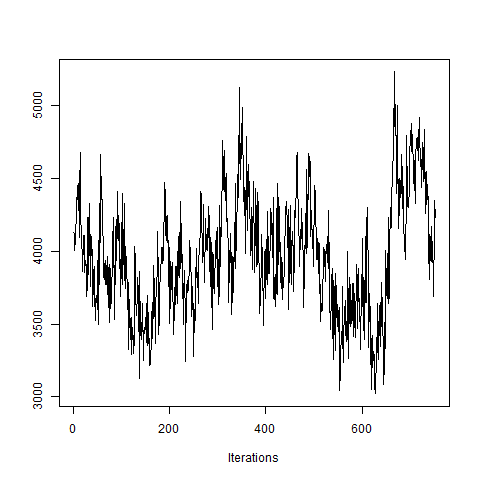

In [136]:
# i. Traceplot of additive variance
img = load("C:/Users/blezn/Julia/BayesA_GV.png")

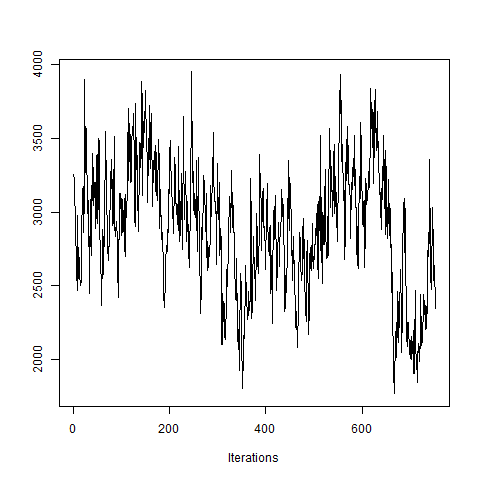

In [137]:
# i. Traceplot of residual variance
img = load("C:/Users/blezn/Julia/BayesA_RV.png")

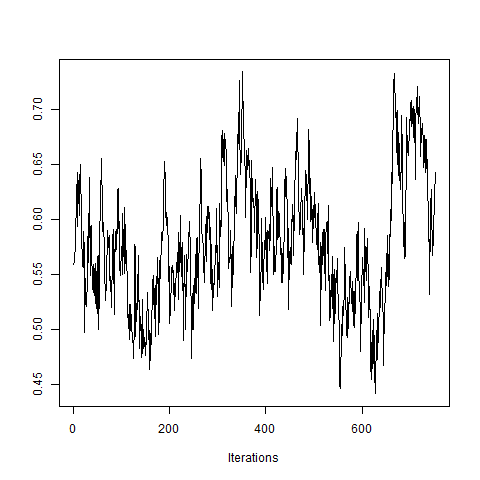

In [139]:
# i. Traceplot of heritability
img = load("C:/Users/blezn/Julia/BayesA_herit.png")

The three variance components showed converge based on the traceplots above.

In [79]:
# ii. varianace components
vc = vcat(out_BayesA["genetic_variance"], out_BayesA["heritability"],out_BayesA["residual variance"])
vc[1, "Covariance"] = "Genetic"
vc[2, "Covariance"] = "Heritability"
vc[3, "Covariance"] = "Residual"
vc

3×3 DataFrame
 Row │ Covariance    Estimate  SD        
     │ Any           Any       Any       
─────┼───────────────────────────────────
   1 │ Genetic       3961.33   393.5
   2 │ Heritability  0.578233  0.0572519
   3 │ Residual      2893.84   424.636

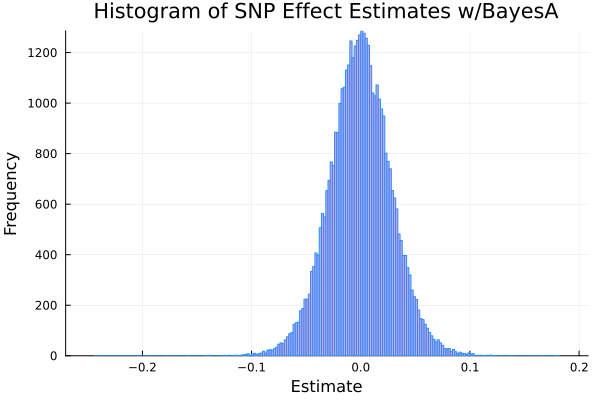

In [81]:
# iii Plot SNP Effects
SNP_effect = out_BayesA["marker effects geno"]
histogram(SNP_effect.Estimate, 
    xlabel = "Estimate", 
    ylabel = "Frequency", 
    title = "Histogram of SNP Effect Estimates w/BayesA",
    color = :plum, 
    linecolor = :dodgerblue,
    legend = false
)

In [83]:
#Adjust ID in genotype with phenotype
#M = filter(row -> row.ID in df_pheno.ID, df_geno)
#M= Matrix.(eachcol(M[:, Not(1)]))
#Obtain allele frequency p
#p = mean.(eachcol(M[:, (Not(1))]))/2

subtitle: BayesA
height: 400
x: SNP
title: Manhattan Plot - ADG
width: 600
y: 2pqα²

geom_point
data: inherits from plot
x: SNP 
y: add_Var 



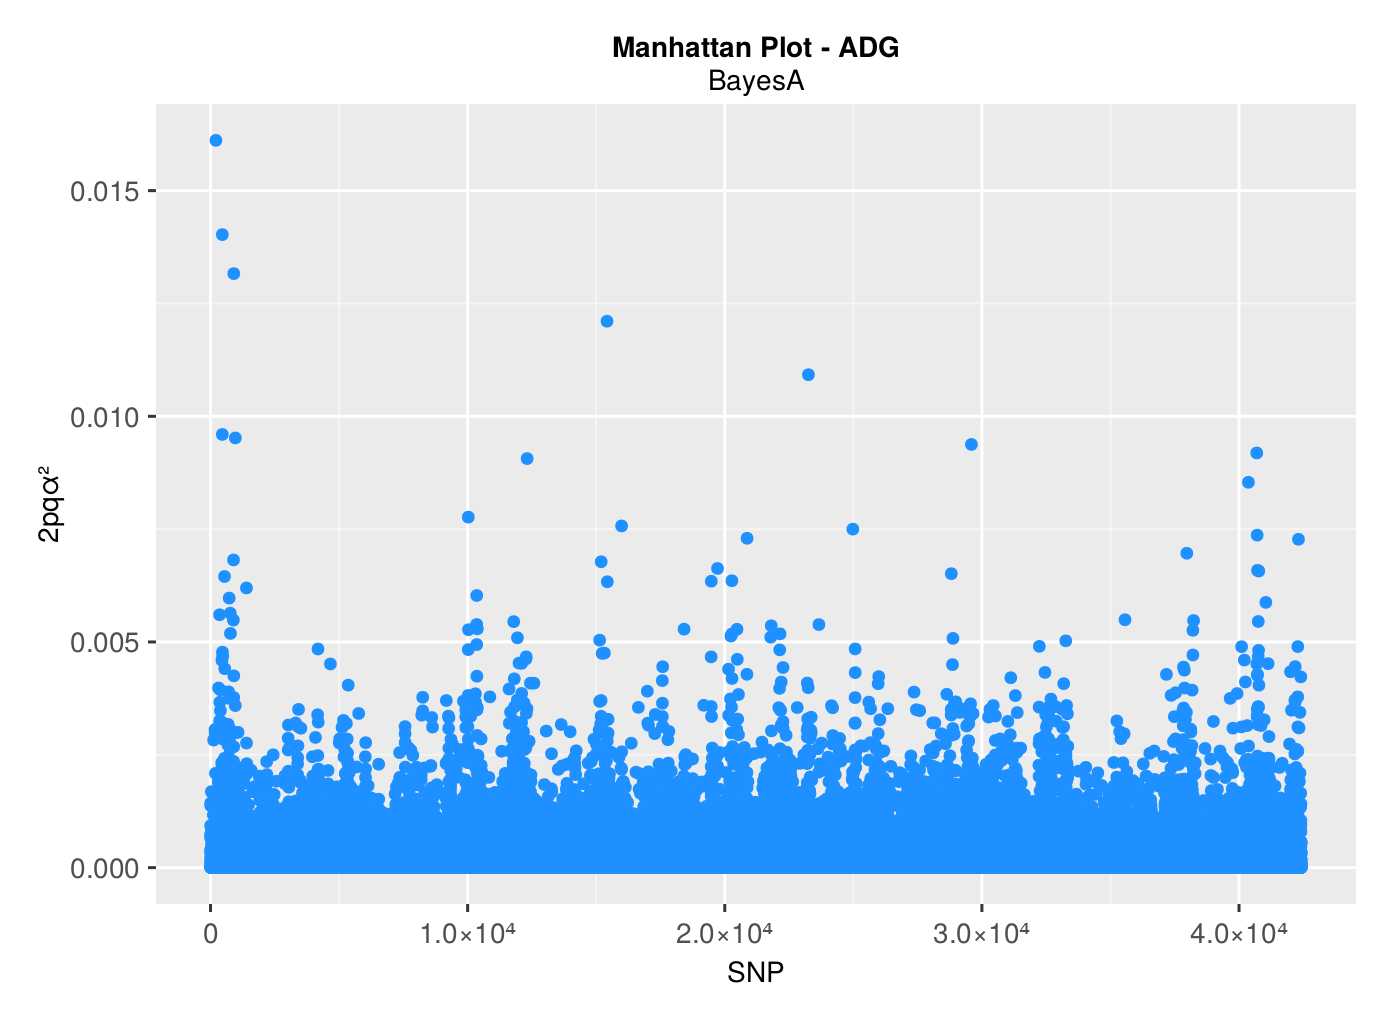

ggplot options

In [85]:
# iv. Plot Manhattan with y = 2pqα^2 with SNP effect

#Adjust ID in genotype with phenotype
M = filter(row -> row.ID in df_pheno.ID, df_geno)

#Obtain allele frequency p
p = mean.(eachcol(M[:, (Not(1))]))/2

bhat1 = SNP_effect[:, :Estimate]
add_var1 = 2. * p .* (1 .- p) .* bhat1 .^ 2
df1 = DataFrame(SNP = 1:length(add_var1), add_Var = add_var1)
plot1 = ggplot(df1) + 
    geom_point(aes(x = "SNP", y = "add_Var"), color=:dodgerblue) +
    labs(
        title = "Manhattan Plot - ADG",
        subtitle = "BayesA",
        x = "SNP",
        y = "2pqα²"
    )

## PartB: Run BayesB with $\pi$ = 0.90

In [87]:
# Part B. Set model genotype
geno2 = get_genotypes(df_geno, method = "BayesB", Pi = 0.90)

The first column in the dataframe should be individual IDs.
The data type of markers should be Number.
Missing values (9.0) are replaced by column means.
0 loci which are fixed or have minor allele frequency < 0.01 are removed.
Genotype informatin:
#markers: 42428; #individuals: 1015


JWAS.Genotypes(false, false, AbstractString["1001", "1002", "1003", "1004", "1006", "1007", "1011", "1012", "1013", "1015"  …  "6447", "6448", "6449", "6450", "6456", "6458", "6476", "6695", "6696", "6701"], ["MARC0044150", "ASGA0000014", "H3GA0000026", "ASGA0000021", "ALGA0000009", "ALGA0000014", "H3GA0000032", "ASGA0000005", "M1GA0000060", "ASGA0000047"  …  "ALGA0100301", "ASGA0081621", "DRGA0017329", "ALGA0100306", "ALGA0100305", "H3GA0052154", "ALGA0100307", "M1GA0023917", "M1GA0023927", "H3GA0052166"], 1015, 42428, [0.39852216839790344 0.8167487978935242 … 0.7876847386360168 0.7876847386360168], 16010.160665452859, true, Float32[0.20295566 -0.6334976 … 0.42463052 0.42463052; 0.20295566 -0.6334976 … 0.42463052 0.42463052; … ; -0.79704434 -0.6334976 … -0.5753695 -0.5753695; 0.20295566 0.3665024 … -0.5753695 -0.5753695], 42428, false, false, false, false, 4.0, "BayesB", true, true, false, false, false, false, false, false, false, false, false, false, 0.9, false, false, false, false, 

In [89]:
#Build model and set covariate
model_equ2 = "ADG = intercept + Sex + Age  + ID + geno2"
model2 = build_model(model_equ2)
#Set covariate
set_covariate(model2, "Age")
#Set random effects
set_random(model2, "ID", df_ped) 

In [91]:
#Run MCMC
out_BayesB = runMCMC(model2,  # model from above
                    df_pheno,    # dataset (ID should be column #1)
                    chain_length  = 2_000,      # 5,000 samples from MCMC
                    burnin        = 500,              # 500 sample burnin (removed)
                    Pi = 0.90,
                    output_folder = "BayesB")

The folder BayesB already exists.
The folder BayesB1 already exists.
The folder BayesB2 is created to save results.
Checking pedigree...
Checking genotypes...
Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Predicted values for individuals of interest will be obtained as the summation of Any["ADG:ID"] (Note that genomic data is always included for now).Phenotypes for 921 observations are used in the analysis.These individual IDs are saved in the file IDs_for_individuals_with_phenotypes.txt.
Prior information for genomic variance is not provided and is generated from the data.
Prior information for residual variance is not provided and is generated from the data.
Prior information for random effect variance is not provided and is generated from the data.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 1.642119



A Linear Mixed Model wa

running MCMC ... 100%|███████████████████████████████████| Time: 0:01:36




The version of Julia and Platform in use:

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × 12th Gen Intel(R) Core(TM) i5-1240P
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, alderlake)
  Threads: 2 on 16 virtual cores


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.




Dict{Any, Any} with 8 entries:
  "marker effects geno2"                => 42428×5 DataFrame…
  "EBV_ADG"                             => 1015×3 DataFrame…
  "heritability"                        => 1×3 DataFrame…
  "location parameters"                 => 1042×5 DataFrame…
  "residual variance"                   => 1×3 DataFrame…
  "polygenic effects covariance matrix" => 1×3 DataFrame…
  "genetic_variance"                    => 1×3 DataFrame…
  "pi_geno2"                            => 1×3 DataFrame…

In [93]:
out_BayesB

Dict{Any, Any} with 8 entries:
  "marker effects geno2"                => 42428×5 DataFrame…
  "EBV_ADG"                             => 1015×3 DataFrame…
  "heritability"                        => 1×3 DataFrame…
  "location parameters"                 => 1042×5 DataFrame…
  "residual variance"                   => 1×3 DataFrame…
  "polygenic effects covariance matrix" => 1×3 DataFrame…
  "genetic_variance"                    => 1×3 DataFrame…
  "pi_geno2"                            => 1×3 DataFrame…

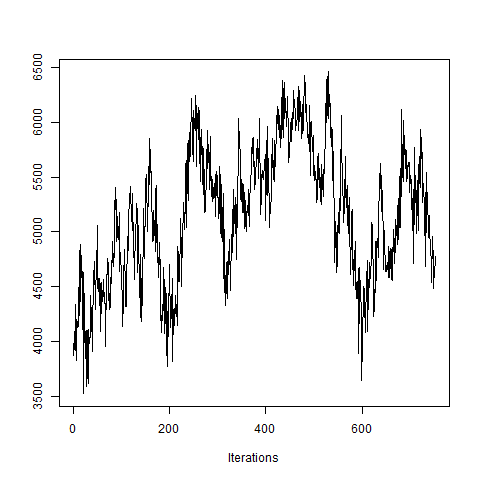

In [140]:
# i. Traceplot of additive variance
img = load("C:/Users/blezn/Julia/BayesB_GV.png")

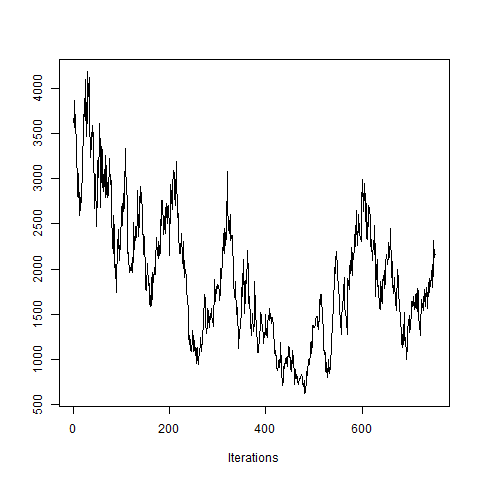

In [141]:
# i. Traceplot of residual variance
img = load("C:/Users/blezn/Julia/BayesB_RV.png")

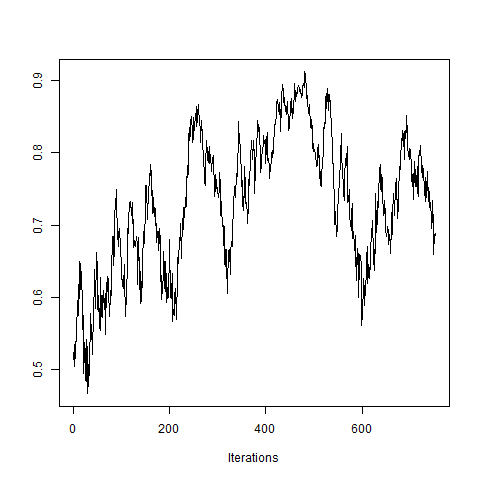

In [142]:
# i. Traceplot of heritability
img = load("C:/Users/blezn/Julia/BayeB_herit.png")

The three variance components showed no converge based on the traceplots above.

In [143]:
# ii. varianace components
vc1 = vcat(out_BayesB["genetic_variance"], out_BayesB["heritability"],out_BayesB["residual variance"])
vc1[1, "Covariance"] = "Genetic"
vc1[2, "Covariance"] = "Heritability"
vc1[3, "Covariance"] = "Residual"
vc1

3×3 DataFrame
 Row │ Covariance    Estimate  SD        
     │ Any           Any       Any       
─────┼───────────────────────────────────
   1 │ Genetic       5142.25   610.039
   2 │ Heritability  0.730987  0.0943505
   3 │ Residual      1909.61   719.797

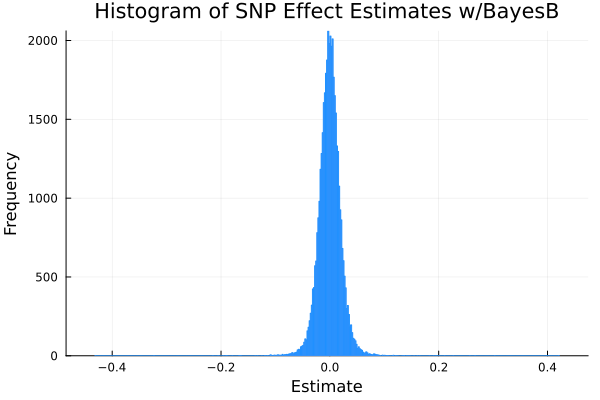

In [103]:
# iii.  Plot SNP Effects
SNP_effect2 = out_BayesB["marker effects geno2"]
histogram(SNP_effect2.Estimate, 
    xlabel = "Estimate", 
    ylabel = "Frequency", 
    title = "Histogram of SNP Effect Estimates w/BayesB",
    color = :plum, 
    linecolor = :dodgerblue,
    legend = false
)

subtitle: BayesB
height: 400
x: SNP
title: Manhattan Plot - ADG
width: 600
y: 2pqα²

geom_point
data: inherits from plot
x: SNP 
y: add_Var 



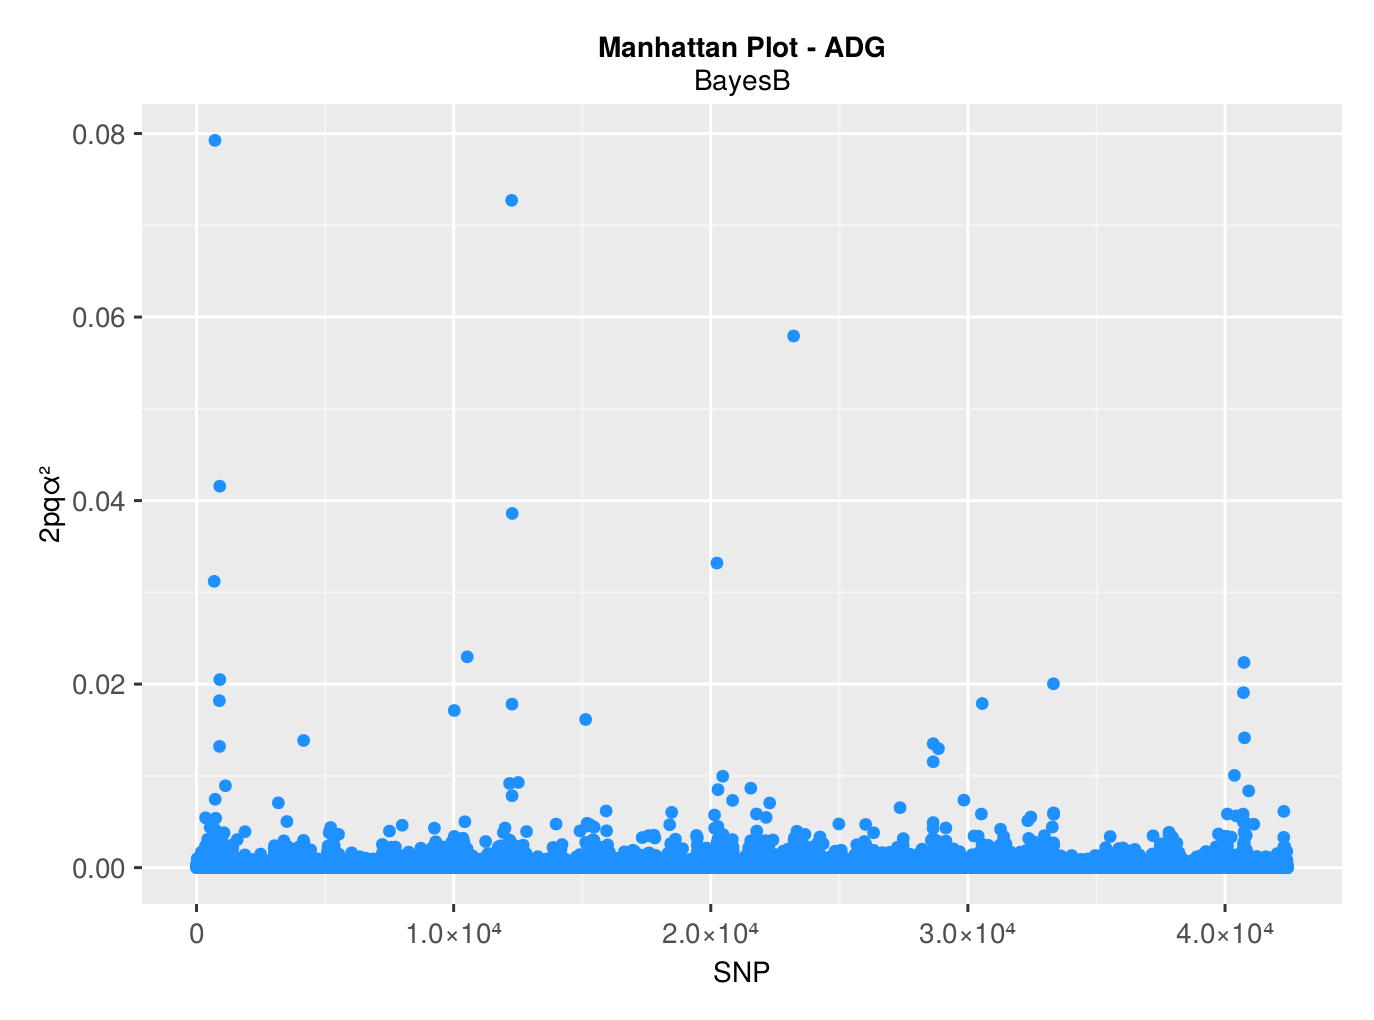

ggplot options

In [105]:
# iv. Plot Manhattan with y = 2pqα^2 with SNP effect
bhat2 = SNP_effect2[:, :Estimate]
add_var2 = 2. * p .* (1 .- p) .* bhat2 .^ 2
df2 = DataFrame(SNP = 1:length(add_var2), add_Var = add_var2)
ggplot(df2) + 
    geom_point(aes(x = "SNP", y = "add_Var"), color=:dodgerblue) +
    labs(
        title = "Manhattan Plot - ADG",
        subtitle = "BayesB",
        x = "SNP",
        y = "2pqα²"
    )

## Part C: Run RR_BLUP

In [107]:
# Part C. Set model genotype
geno3 = get_genotypes(df_geno, method = "RR-BLUP")

The first column in the dataframe should be individual IDs.
The data type of markers should be Number.
Missing values (9.0) are replaced by column means.
0 loci which are fixed or have minor allele frequency < 0.01 are removed.
Genotype informatin:
#markers: 42428; #individuals: 1015


JWAS.Genotypes(false, false, AbstractString["1001", "1002", "1003", "1004", "1006", "1007", "1011", "1012", "1013", "1015"  …  "6447", "6448", "6449", "6450", "6456", "6458", "6476", "6695", "6696", "6701"], ["MARC0044150", "ASGA0000014", "H3GA0000026", "ASGA0000021", "ALGA0000009", "ALGA0000014", "H3GA0000032", "ASGA0000005", "M1GA0000060", "ASGA0000047"  …  "ALGA0100301", "ASGA0081621", "DRGA0017329", "ALGA0100306", "ALGA0100305", "H3GA0052154", "ALGA0100307", "M1GA0023917", "M1GA0023927", "H3GA0052166"], 1015, 42428, [0.39852216839790344 0.8167487978935242 … 0.7876847386360168 0.7876847386360168], 16010.160665452859, true, Float32[0.20295566 -0.6334976 … 0.42463052 0.42463052; 0.20295566 -0.6334976 … 0.42463052 0.42463052; … ; -0.79704434 -0.6334976 … -0.5753695 -0.5753695; 0.20295566 0.3665024 … -0.5753695 -0.5753695], 42428, false, false, false, false, 4.0, "RR-BLUP", true, true, false, false, false, false, false, false, false, false, false, false, 0.0, false, false, false, false,

In [109]:
#Build model and set covariate
model_equ3 = "ADG = intercept + Sex + Age  + ID + geno3"
model3 = build_model(model_equ3)
#Set covariate
set_covariate(model3, "Age")
#Set random effects
set_random(model3, "ID", df_ped) 

In [111]:
#Run MCMC
out_RR = runMCMC(model3,  # model from above
                    df_pheno,    # dataset (ID should be column #1)
                    chain_length  = 2_000,      # 5,000 samples from MCMC
                    burnin        = 500,              # 500 sample burnin (removed)
                    output_folder = "RR")

The folder RR already exists.
The folder RR1 is created to save results.
RR-BLUP runs with estimatePi = false.
Checking pedigree...
Checking genotypes...
Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Predicted values for individuals of interest will be obtained as the summation of Any["ADG:ID"] (Note that genomic data is always included for now).Phenotypes for 921 observations are used in the analysis.These individual IDs are saved in the file IDs_for_individuals_with_phenotypes.txt.
Prior information for genomic variance is not provided and is generated from the data.
Prior information for residual variance is not provided and is generated from the data.
Prior information for random effect variance is not provided and is generated from the data.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.164212



A Linear Mixed Model was bui

running MCMC ...   0%|█                                  |  ETA: 0:00:56

The file RR1/MCMC_samples_heritability.txt is created to save MCMC samples for heritability.


running MCMC ... 100%|███████████████████████████████████| Time: 0:01:17




The version of Julia and Platform in use:

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × 12th Gen Intel(R) Core(TM) i5-1240P
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, alderlake)
  Threads: 2 on 16 virtual cores


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.




Dict{Any, Any} with 7 entries:
  "heritability"                        => 1×3 DataFrame…
  "EBV_ADG"                             => 1015×3 DataFrame…
  "location parameters"                 => 1042×5 DataFrame…
  "residual variance"                   => 1×3 DataFrame…
  "polygenic effects covariance matrix" => 1×3 DataFrame…
  "genetic_variance"                    => 1×3 DataFrame…
  "marker effects geno3"                => 42428×5 DataFrame…

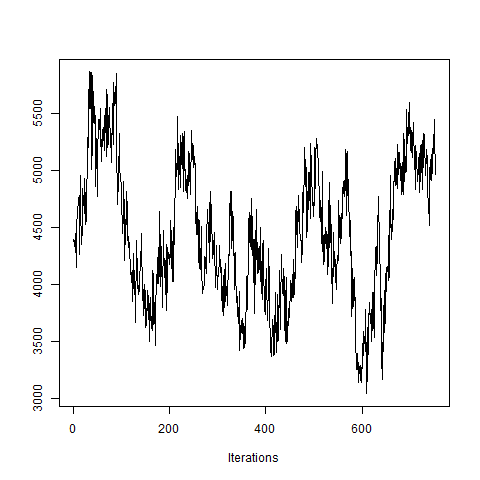

In [144]:
# i. Traceplot of additive variance
img = load("C:/Users/blezn/Julia/RR_GV.png")

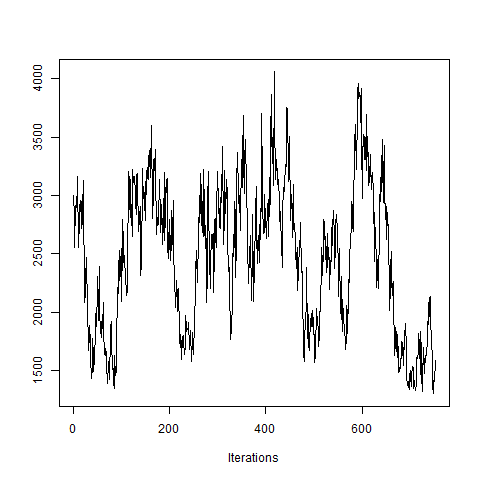

In [145]:
# i. Traceplot of residual variance
img = load("C:/Users/blezn/Julia/RR_RV.png")

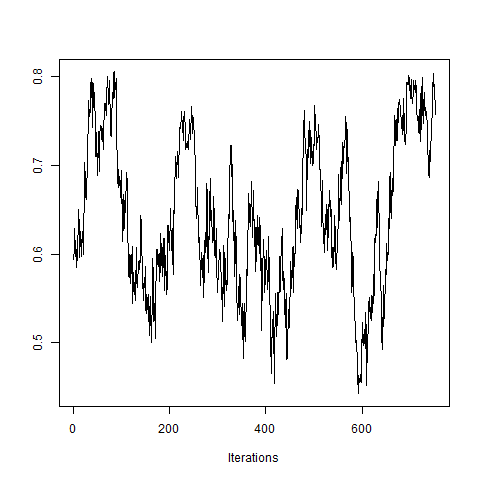

In [147]:
# i. Traceplot of heritability
img = load("C:/Users/blezn/Julia/RR_herit.png")

The additive variance showed converge while heritability and residual variance showed no convergence based on the tracplots above.

In [119]:
# ii. varianace components
vc2 = vcat(out_RR["genetic_variance"], out_RR["heritability"],out_RR["residual variance"])
vc2[1, "Covariance"] = "Genetic"
vc2[2, "Covariance"] = "Heritability"
vc2[3, "Covariance"] = "Residual"
vc2

3×3 DataFrame
 Row │ Covariance    Estimate  SD        
     │ Any           Any       Any       
─────┼───────────────────────────────────
   1 │ Genetic       4440.25   597.785
   2 │ Heritability  0.643131  0.0861574
   3 │ Residual      2469.01   616.161

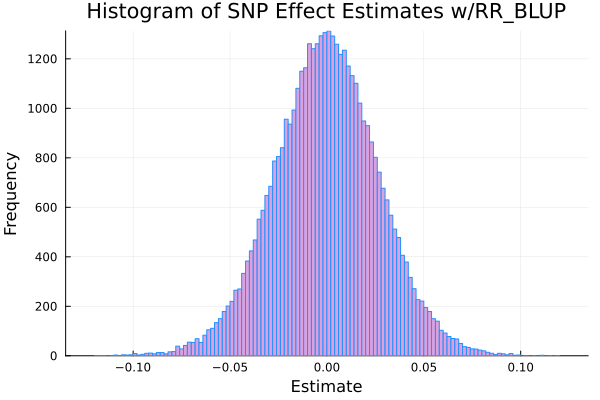

In [121]:
# iii. Plot SNP Effects
SNP_effect3 = out_RR["marker effects geno3"]
histogram(SNP_effect3.Estimate, 
    xlabel = "Estimate", 
    ylabel = "Frequency", 
    title = "Histogram of SNP Effect Estimates w/RR_BLUP",
    color = :plum, 
    linecolor = :dodgerblue,
    legend = false
)

subtitle: RR-BLUP
height: 400
x: SNP
title: Manhattan Plot - ADG
width: 600
y: 2pqα²

geom_point
data: inherits from plot
x: SNP 
y: add_Var 



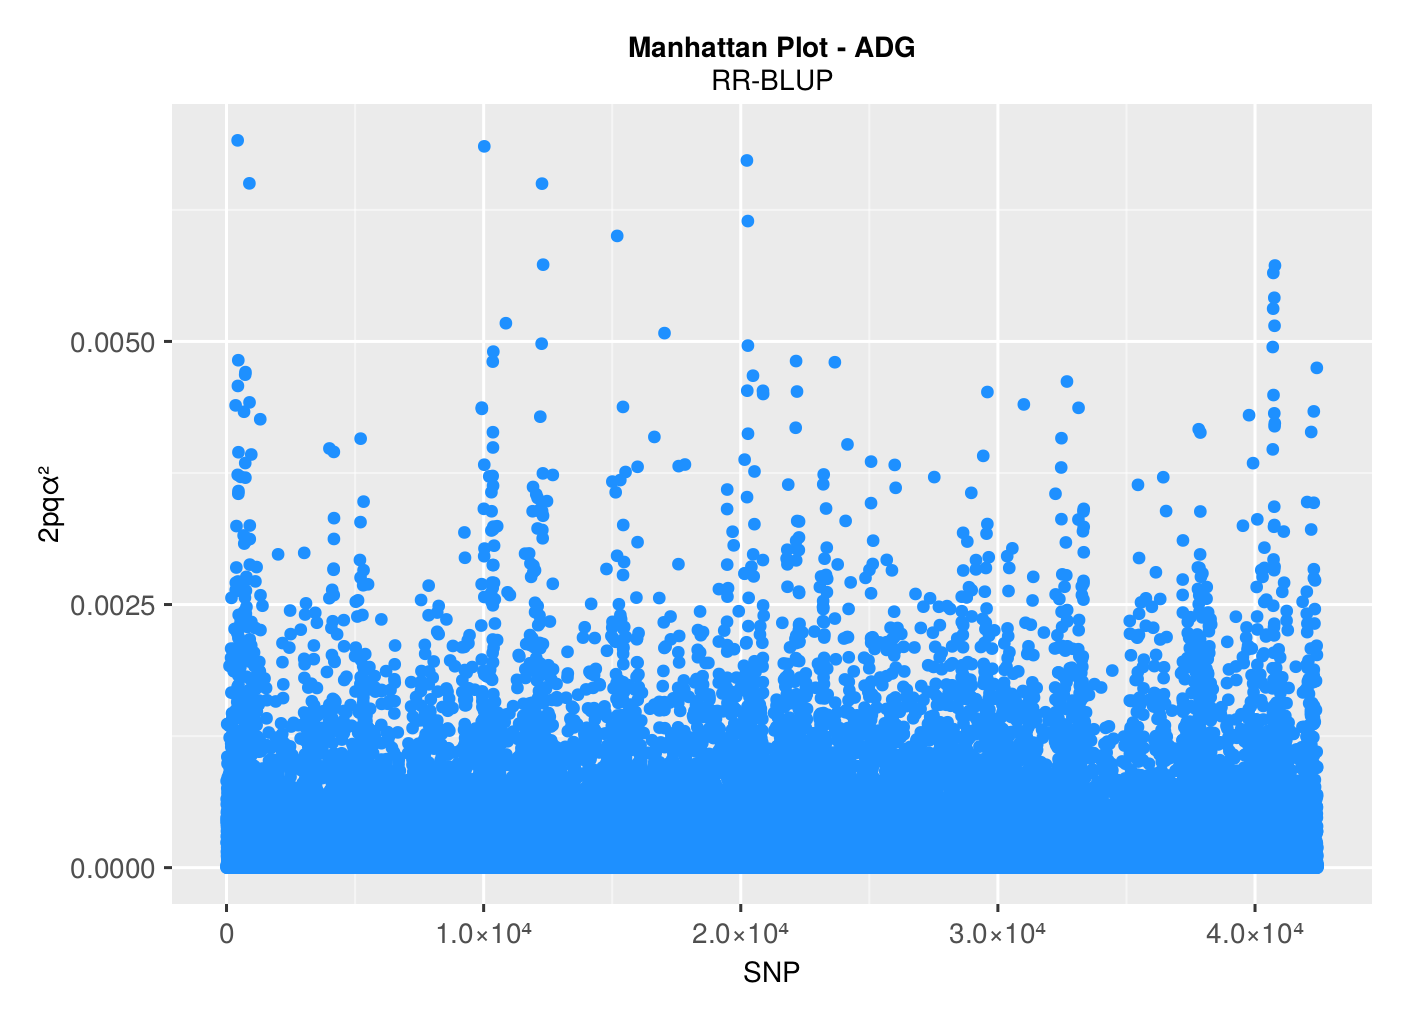

ggplot options

In [123]:
# iv. Plot Manhattan with y = 2pqα^2 with SNP effect
bhat3 = SNP_effect3[:, :Estimate]
add_var3 = 2. * p .* (1 .- p) .* bhat3 .^ 2
df3 = DataFrame(SNP = 1:length(add_var3), add_Var = add_var3)
ggplot(df3) + 
    geom_point(aes(x = "SNP", y = "add_Var"), color=:dodgerblue) +
    labs(
        title = "Manhattan Plot - ADG",
        subtitle = "RR-BLUP",
        x = "SNP",
        y = "2pqα²"
    )

## Part D

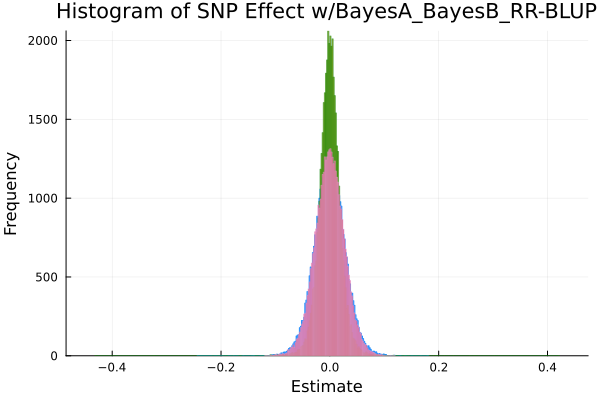

In [125]:
# Part D. i. 
histogram(SNP_effect.Estimate, 
    xlabel = "Estimate", 
    ylabel = "Frequency", 
    title = "Histogram of SNP Effect w/BayesA_BayesB_RR-BLUP",
    color = :plum, 
    linecolor = :dodgerblue,
    legend = false
)
histogram!(SNP_effect2.Estimate, color = :orange, linecolor = :green, alpha = 0.6)
histogram!(SNP_effect3.Estimate, color = :red, linecolor = :plum, alpha = 0.6)

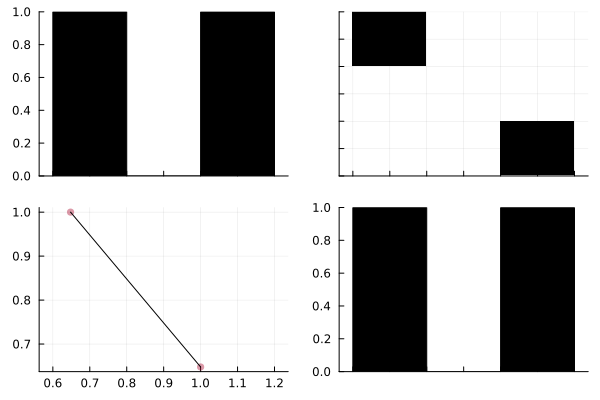

In [127]:
# ii. Correlation between Bayes A and Bayes B SNP effects
df = DataFrame(A = SNP_effect.Estimate, B = SNP_effect2.Estimate)
cord = cor(Matrix(df))
corrplot(cord)

subtitle: BayesA vs BayesB
height: 400
x: SNP Effect (BayesA)
title: Correlation between SNP marker estimates
width: 600
y: SNP Effect (BayesB)

geom_point
data: inherits from plot
x: not specified 
y: not specified 

geom_smooth
data: inherits from plot
x: not specified 
y: not specified 



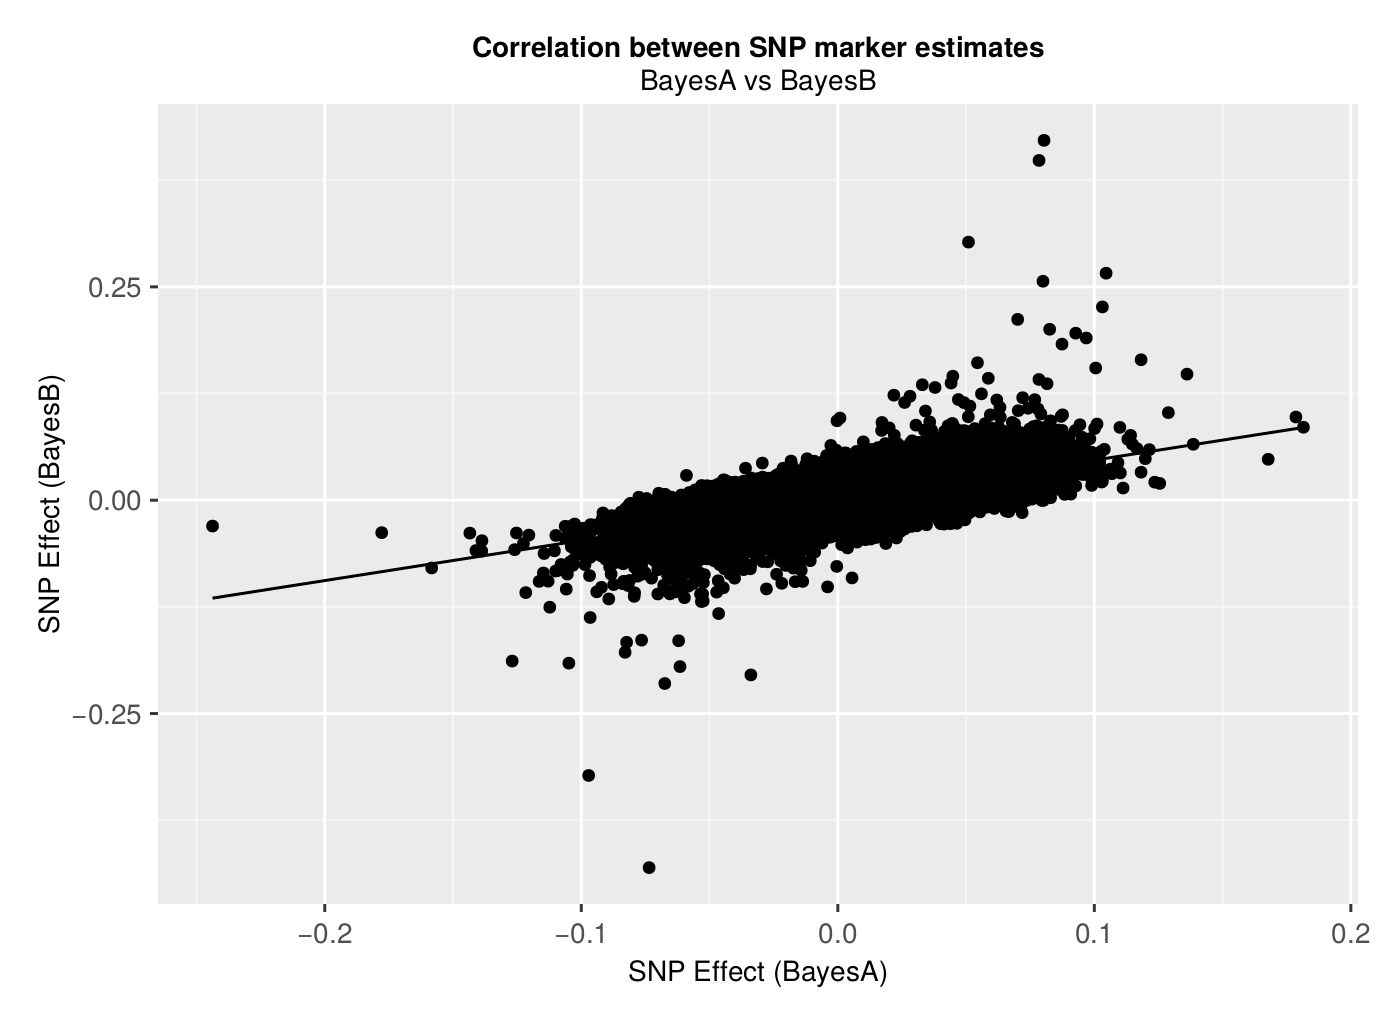

ggplot options

In [129]:
ggplot(df,aes(x = :A, y = :B)) + 
    geom_point(alpha=0.1) +
    geom_smooth(method = "lm") +
    #scale_x_continuous(limits = [-3, 3]) +
    labs(
        title = "Correlation between SNP marker estimates",
        subtitle = "BayesA vs BayesB",
        x = "SNP Effect (BayesA)",
        y = "SNP Effect (BayesB)"
    )

In [179]:
cor(Matrix(df))

2×2 Matrix{Float32}:
 1.0       0.647929
 0.647929  1.0

There is moderate correlation between SNP effects with Bayes A and B.

In [156]:
# iii Create breeding values

df_Z = CSV.read("C:/Users/blezn/Julia/Z_jl.csv", DataFrame)
Z_d = df_Z[:, 2:end]
M = Matrix(Z_d)

921×42428 DataFrame
 Row │ MARC0044150  ASGA0000014  H3GA0000026  ASGA0000021  ALGA0000009  ALGA00 ⋯
     │ Float64      Float64      Float64      Float64      Float64      Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2 ⋯
   2 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2
   3 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2
   4 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2
   5 │   -0.803474     -0.65038     0.790445     0.803474     0.790445     0.7 ⋯
   6 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2
   7 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2
   8 │   -0.803474     -0.65038     0.790445     0.803474     0.790445     0.7
   9 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2 ⋯
  10 │   -0.803474     -0.65038     0.790445     0.803474     0.790445     0.7
  11 │    0.196526     -0.65038    -0.209555    -0.196526    -0.209555    -0.2
  ⋮  │      ⋮            ⋮            ⋮            ⋮            ⋮            ⋮ ⋱
 912 │    0.196526      0.34962    -0.209555    -0.196526    -0.209555    -0.2
 913 │    0.196526      0.34962    -0.209555    -0.196526    -0.209555    -0.2 ⋯
 914 │    0.196526      0.34962    -0.209555    -0.196526    -0.209555    -0.2
 915 │    0.196526      0.34962    -0.209555    -0.196526    -0.209555    -0.2
 916 │   -0.803474      0.34962     0.790445     0.803474     0.790445     0.7
 917 │   -0.803474      0.34962     0.790445     0.803474     0.790445     0.7 ⋯
 918 │   -0.803474      0.34962     0.790445     0.803474     0.790445     0.7
 919 │   -0.803474     -0.65038     0.790445     0.803474     0.790445     0.7
 920 │   -0.803474     -1.65038     0.790445     0.803474     0.790445     0.7
 921 │   -0.803474     -0.65038     0.790445     0.803474     0.790445     0.7 ⋯
                                              42423 columns and 900 rows omitted

In [165]:
bv = *(M, SNP_effect.Estimate)
first(bv, 5)

5-element Vector{Any}:
  28.33490064314361
 -25.04503353315709
  20.440238102076094
  36.40513599194298
 -33.09397427746721

In [ ]:
length(bv)

In [166]:
bv2 = *(M, SNP_effect2.Estimate)
first(bv2, 5)

5-element Vector{Any}:
  10.798024817988038
 -20.716980778532214
   7.432880233037992
  18.388445438143222
 -18.91676916703525

In [167]:
length(bv2)

921

subtitle: BayesA vs BayesB
height: 400
x: SNP Effect (BayesA)
title: Correlation between breeding values
width: 600
y: SNP Effect (BayesB)

geom_point
data: inherits from plot
x: not specified 
y: not specified 

geom_smooth
data: inherits from plot
x: not specified 
y: not specified 



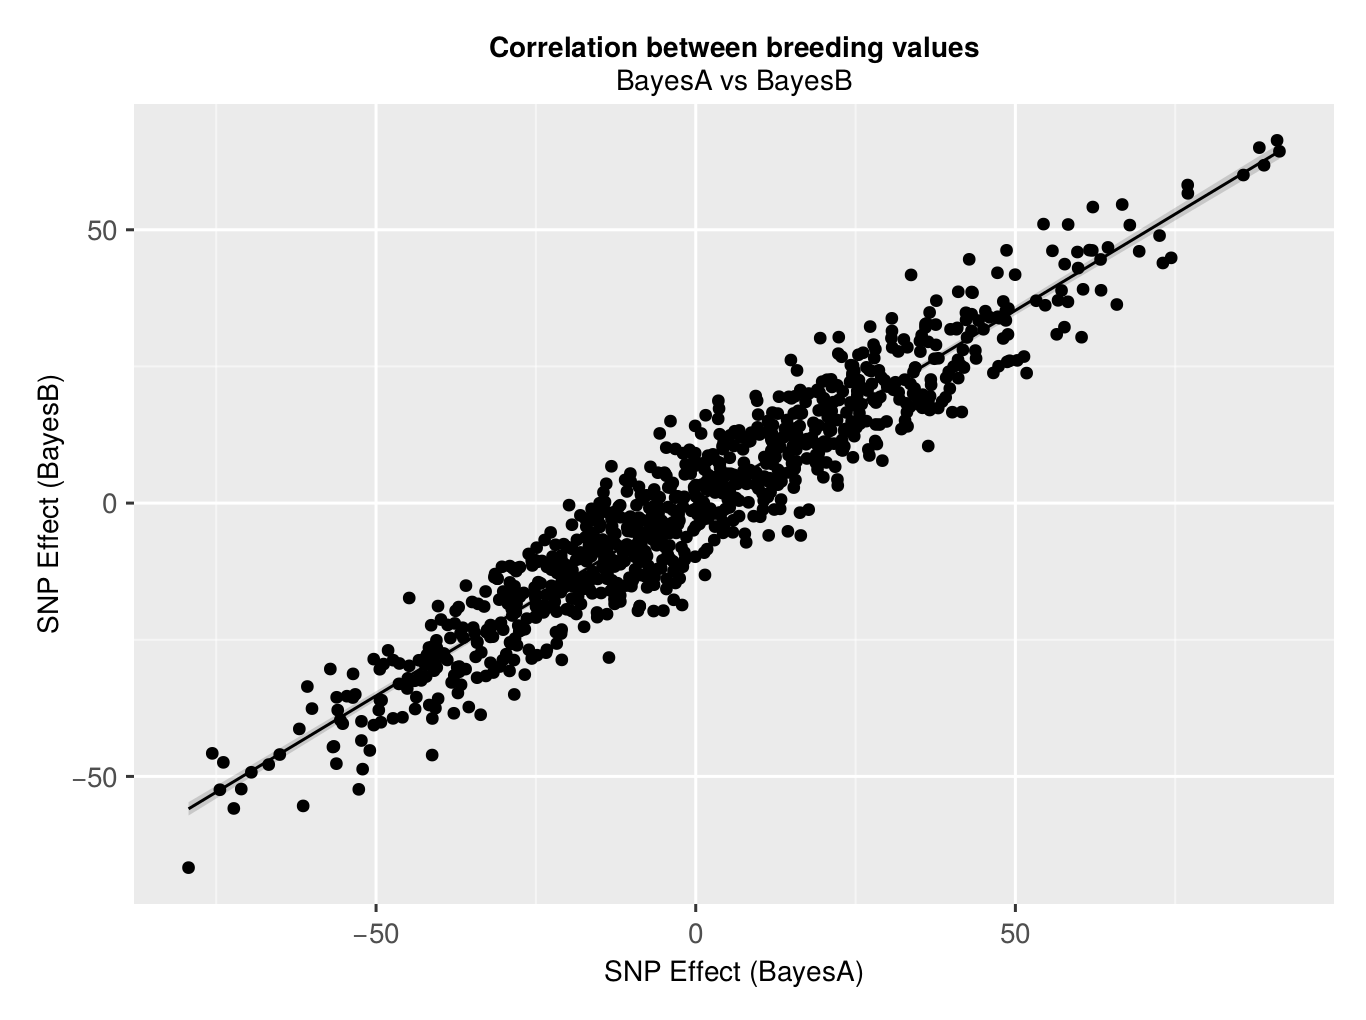

ggplot options

In [170]:
df_bv = DataFrame(A = bv, B = bv2)
ggplot(df_bv,aes(x = :A, y = :B)) + 
    geom_point(alpha=0.1) +
    geom_smooth(method = "lm") +
    #scale_x_continuous(limits = [-3, 3]) +
    labs(
        title = "Correlation between breeding values",
        subtitle = "BayesA vs BayesB",
        x = "SNP Effect (BayesA)",
        y = "SNP Effect (BayesB)"
    )

In [178]:
cor(Matrix(df_bv))

2×2 Matrix{Float64}:
 1.0       0.952828
 0.952828  1.0

In [168]:
bv3 = *(M, SNP_effect3.Estimate)
first(bv3, 5)

5-element Vector{Any}:
  28.543821792402866
 -21.476230214133846
  21.53002483677937
  33.98268445777242
 -31.504959747540862

In [169]:
length(bv3)

921

subtitle: BayesA vs BayesB
height: 400
x: SNP Effect (BayesA)
title: Correlation between breeding values
width: 600
y: SNP Effect (SNP-BLUP)

geom_point
data: inherits from plot
x: not specified 
y: not specified 

geom_smooth
data: inherits from plot
x: not specified 
y: not specified 



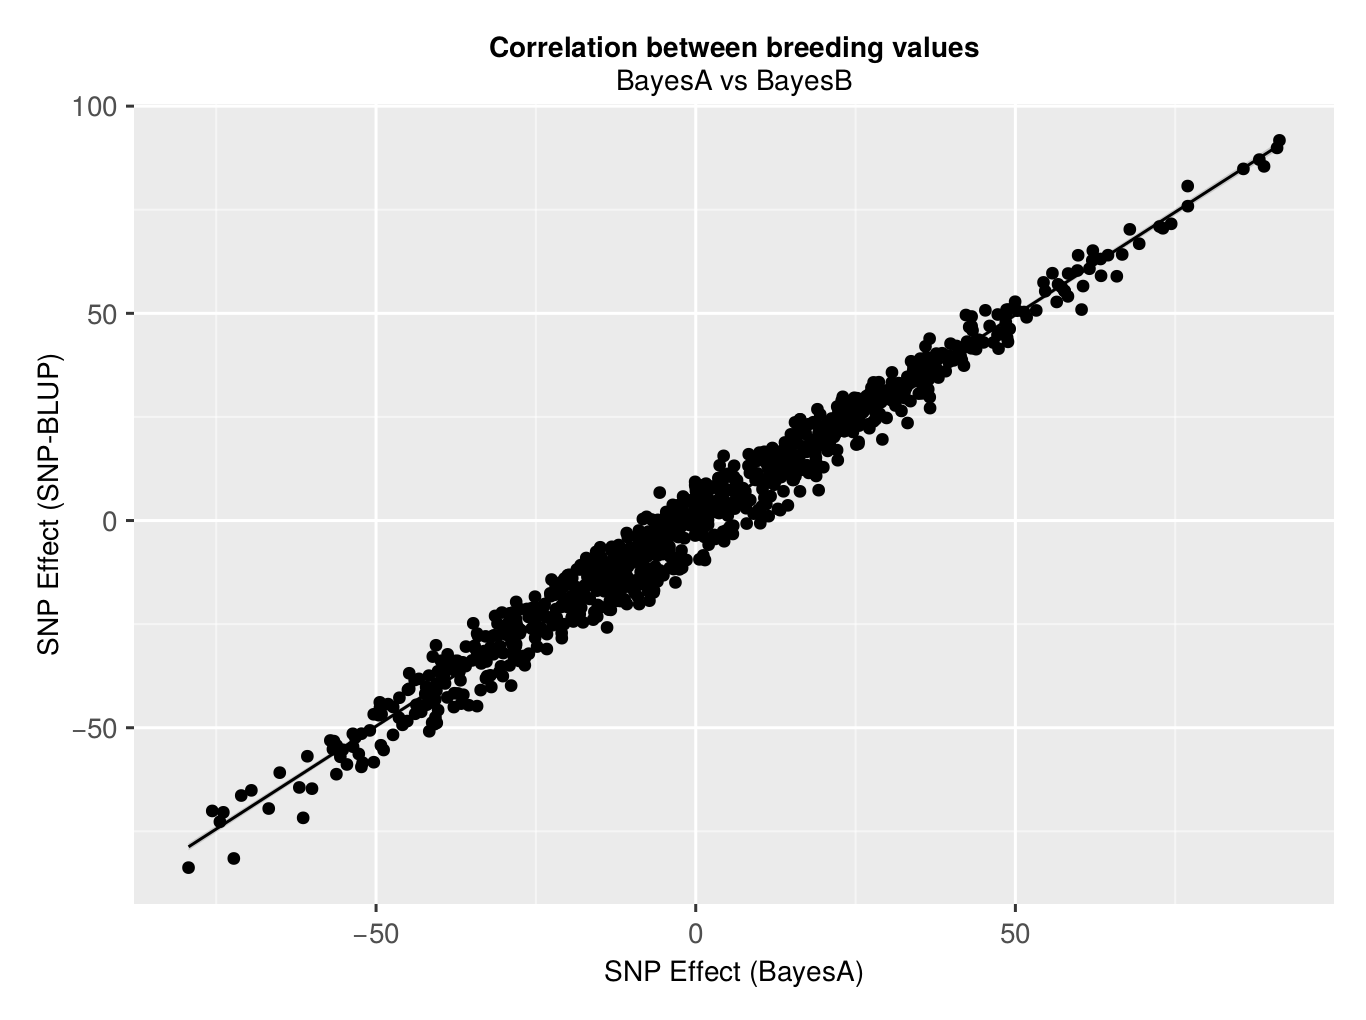

ggplot options

In [171]:
df_bv2 = DataFrame(A = bv, B = bv3)
ggplot(df_bv2,aes(x = :A, y = :B)) + 
    geom_point(alpha=0.1) +
    geom_smooth(method = "lm") +
    labs(
        title = "Correlation between breeding values",
        subtitle = "BayesA vs BayesB",
        x = "SNP Effect (BayesA)",
        y = "SNP Effect (SNP-BLUP)"
    )

In [177]:
cor(Matrix(df_bv2))

2×2 Matrix{Float64}:
 1.0       0.987948
 0.987948  1.0

subtitle: BayesA vs BayesB
height: 400
x: SNP Effect (BayesB)
title: Correlation between breeding values
width: 600
y: SNP Effect (SNP-BLUP)

geom_point
data: inherits from plot
x: not specified 
y: not specified 

geom_smooth
data: inherits from plot
x: not specified 
y: not specified 



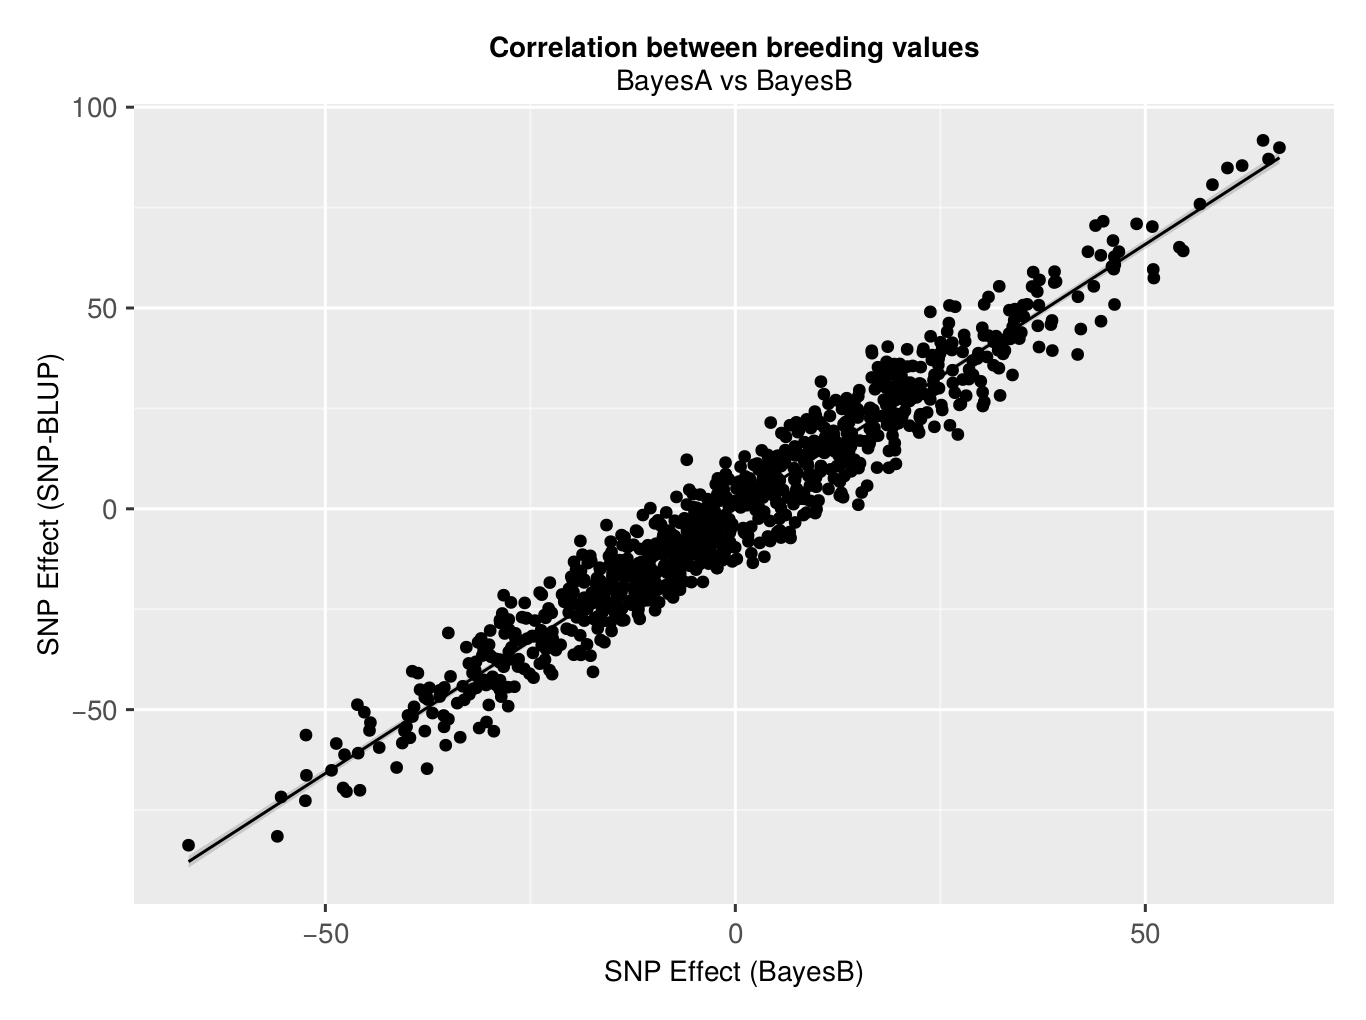

ggplot options

In [172]:
df_bv3 = DataFrame(A = bv2, B = bv3)
ggplot(df_bv3,aes(x = :A, y = :B)) + 
    geom_point(alpha=0.1) +
    geom_smooth(method = "lm") +
    labs(
        title = "Correlation between breeding values",
        subtitle = "BayesA vs BayesB",
        x = "SNP Effect (BayesB)",
        y = "SNP Effect (SNP-BLUP)"
    )

In [176]:
cor(Matrix(df_bv3))

2×2 Matrix{Float64}:
 1.0       0.970351
 0.970351  1.0

In [ ]:
The highest correlation was observed between SNP-BLUP and BayesB

In [173]:
## iv Compare and contrast the variance components
comb_vc = vcat(vc, vc1, vc2)
comb_vc[1, "Covariance"] = "BayesA_Genetic"
comb_vc[2, "Covariance"] = "BayesA_Heritability"
comb_vc[3, "Covariance"] = "BayesA_Residual"
comb_vc[4, "Covariance"] = "BayesB_Genetic"
comb_vc[5, "Covariance"] = "BayesB_Heritability"
comb_vc[6, "Covariance"] = "BayesB_Residual"
comb_vc[7, "Covariance"] = "RR_Genetic"
comb_vc[8, "Covariance"] = "RR_Heritability"
comb_vc[9, "Covariance"] = "RR_Residual"
comb_vc

9×3 DataFrame
 Row │ Covariance           Estimate  SD        
     │ Any                  Any       Any       
─────┼──────────────────────────────────────────
   1 │ BayesA_Genetic       3961.33   393.5
   2 │ BayesA_Heritability  0.578233  0.0572519
   3 │ BayesA_Residual      2893.84   424.636
   4 │ BayesB_Genetic       5142.25   610.039
   5 │ BayesB_Heritability  0.730987  0.0943505
   6 │ BayesB_Residual      1909.61   719.797
   7 │ RR_Genetic           4440.25   597.785
   8 │ RR_Heritability      0.643131  0.0861574
   9 │ RR_Residual          2469.01   616.161

Variance components in Bayes A showed that variation in ADG is less explained by genetic when compared with BayesB and RR-BLUP. BayesB has the highest estimation for heritability. Overall, the methods gave high heritability value to ADG. 

#### Comment for Question 3 Part Ai, PartBi, and PartCi
Due to the stochastic process involved in MCMC algorithm, I could not provide comment on these questions about convergence in the rendered Quarto file.

PartAi. No convergence.

PartBi. Convergence can be observed in residual variance and heritability.

PartCi. Convergence can be observed in residual variance only.